In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
online = pd.read_excel('Online Retail.xlsx')

In [2]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
online.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
online.shape

(541909, 8)

In [8]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
online.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
online['Description'] = online['Description'].str.lower()

In [5]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540454 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
online.loc[online['Quantity'] == -80995]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"paper craft , little birdie",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [10]:
online.loc[online['Quantity'] == 80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [6]:
online['Quantity'] = online['Quantity'].clip(lower=0)
online = online[~(online == 0).any(axis=1)]
online['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    33,    13,    70,   252,    60,
         216,   384,    27,    15,    22,    19,    17,    21,    34,
          47,   108,    52,    75,   270,    42,   240,    90,   320,
        1824,   204,    69,   160,  2880,  1400,    39,    56,    26,
        1440,    31,    82,    78,    97,    98,    35,   720,   156,
         324,    38,    37,    49,    95,    29,    41,   402,   378,
         150,   300,    54,   104,    67,   258,    66,    44,    55,
          46,    99,    61,   408,   972,   208,  1008,  1000,  1488,
         250,  1394,   400,   110,   272,    84,   113,    45,   106,
          68,   267,   115,    65,  1728,    53,    76,    71,    43,
         213,    58,

In [7]:
online.loc[online['StockCode'] == 23843]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [8]:
online.dropna(inplace = True)

In [9]:
online.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
online.shape

(397884, 8)

In [19]:
len(online['Description'].unique())

3877

# Apriori Algo for country 'RSA'

In [62]:
print(online.Country.unique())
print(online.loc[online['Country'] == 'RSA'].count())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
InvoiceNo      57
StockCode      57
Description    57
Quantity       57
InvoiceDate    57
UnitPrice      57
CustomerID     57
Country        57
dtype: int64


In [63]:
#select data for country 'RSA'
online_RSA = online[online['Country']=='RSA']
online_RSA.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395472,571035,21238,red retrospot cup,8,2011-10-13 12:50:00,0.85,12446.0,RSA
395473,571035,21243,pink polkadot plate,8,2011-10-13 12:50:00,1.69,12446.0,RSA
395474,571035,23240,set of 4 knick knack tins doily,6,2011-10-13 12:50:00,4.15,12446.0,RSA
395475,571035,23209,lunch bag vintage doily,10,2011-10-13 12:50:00,1.65,12446.0,RSA
395476,571035,23201,jumbo bag alphabet,10,2011-10-13 12:50:00,2.08,12446.0,RSA


In [64]:
online_RSA.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395472,571035,21238,red retrospot cup,8,2011-10-13 12:50:00,0.85,12446.0,RSA
395473,571035,21243,pink polkadot plate,8,2011-10-13 12:50:00,1.69,12446.0,RSA
395474,571035,23240,set of 4 knick knack tins doily,6,2011-10-13 12:50:00,4.15,12446.0,RSA
395475,571035,23209,lunch bag vintage doily,10,2011-10-13 12:50:00,1.65,12446.0,RSA
395476,571035,23201,jumbo bag alphabet,10,2011-10-13 12:50:00,2.08,12446.0,RSA


In [68]:
online_RSA.shape

(57, 8)

In [69]:
online_RSA.Quantity.unique()

array([ 8,  6, 10,  5, 12,  4,  3,  2], dtype=int64)

In [70]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [71]:
#hot_encoded_online = online.groupby(['Quantity_Group','Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Quantity_Group')
hot_encoded_online_RSA = online_RSA.groupby(['Quantity','Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Quantity')
hot_encoded_online_RSA.head()

Description,4 traditional spinning tops,alarm clock bakelike red,assorted bottle top magnets,baking set 9 piece retrospot,belle jardiniere cushion cover,birdhouse garden marker,card holder love bird small,charlotte bag vintage alphabet,childrens toy cooking utensil set,classic glass cookie jar,...,set of 6 soldier skittles,spaceboy mini backpack,spaceboy wall art,spotty bunting,toy tidy pink polkadot,toy tidy spaceboy,victorian glass hanging t-light,wheelbarrow for children,wooden box of dominoes,wooden croquet garden set
Quantity,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [73]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_online_RSA  =  hot_encoded_online_RSA.applymap(encode_units)

In [74]:
hot_encoded_online_RSA

Description,4 traditional spinning tops,alarm clock bakelike red,assorted bottle top magnets,baking set 9 piece retrospot,belle jardiniere cushion cover,birdhouse garden marker,card holder love bird small,charlotte bag vintage alphabet,childrens toy cooking utensil set,classic glass cookie jar,...,set of 6 soldier skittles,spaceboy mini backpack,spaceboy wall art,spotty bunting,toy tidy pink polkadot,toy tidy spaceboy,victorian glass hanging t-light,wheelbarrow for children,wooden box of dominoes,wooden croquet garden set
Quantity,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6,0,0,0,0,0,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
frequent_itemsets_RSA  =  apriori(hot_encoded_online_RSA, min_support = 0.01, use_colnames = True)

In [82]:
rules_RSA  =  association_rules(frequent_itemsets_RSA, metric = "lift", min_threshold = 1)
rules_RSA.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(assorted bottle top magnets ),(4 traditional spinning tops),0.125,0.125,0.125,1.0,8.0,0.109375,inf
1,(4 traditional spinning tops),(assorted bottle top magnets ),0.125,0.125,0.125,1.0,8.0,0.109375,inf
2,(4 traditional spinning tops),(pack of 6 birdy gift tags),0.125,0.125,0.125,1.0,8.0,0.109375,inf
3,(pack of 6 birdy gift tags),(4 traditional spinning tops),0.125,0.125,0.125,1.0,8.0,0.109375,inf
4,(set of 20 kids cookie cutters),(4 traditional spinning tops),0.125,0.125,0.125,1.0,8.0,0.109375,inf
5,(4 traditional spinning tops),(set of 20 kids cookie cutters),0.125,0.125,0.125,1.0,8.0,0.109375,inf
6,(wooden box of dominoes),(4 traditional spinning tops),0.125,0.125,0.125,1.0,8.0,0.109375,inf
7,(4 traditional spinning tops),(wooden box of dominoes),0.125,0.125,0.125,1.0,8.0,0.109375,inf
8,(alarm clock bakelike red ),(belle jardiniere cushion cover),0.125,0.125,0.125,1.0,8.0,0.109375,inf
9,(belle jardiniere cushion cover),(alarm clock bakelike red ),0.125,0.125,0.125,1.0,8.0,0.109375,inf


In [78]:
rules_RSA.sort_values('confidence', ascending  =  False, inplace  =  True)
rules_RSA.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(assorted bottle top magnets ),(4 traditional spinning tops),0.125,0.125,0.125,1.0,8.0,0.109375,inf
270596,(classic glass cookie jar),"(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270594,(spaceboy wall art),"(set of 4 knick knack tins doily , classic gla...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270593,"(victorian glass hanging t-light, recipe box p...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270592,"(childrens toy cooking utensil set, recipe box...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270591,"(childrens toy cooking utensil set, victorian ...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270590,"(recipe box pantry yellow design, rabbit desi...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270589,"(victorian glass hanging t-light, rabbit desi...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270588,"(childrens toy cooking utensil set, rabbit de...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270587,"(spotty bunting, recipe box pantry yellow design)","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf


In [79]:
rules_RSA = rules_RSA[rules_RSA['confidence']>= 0.55]
rules_RSA.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(assorted bottle top magnets ),(4 traditional spinning tops),0.125,0.125,0.125,1.0,8.0,0.109375,inf
270596,(classic glass cookie jar),"(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270594,(spaceboy wall art),"(set of 4 knick knack tins doily , classic gla...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270593,"(victorian glass hanging t-light, recipe box p...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf
270592,"(childrens toy cooking utensil set, recipe box...","(spaceboy wall art, set of 4 knick knack tins ...",0.125,0.125,0.125,1.0,8.0,0.109375,inf


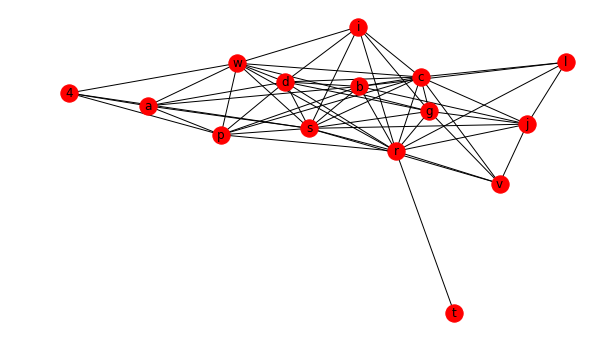

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
rules_RSA.antecedents  =  rules_RSA.antecedents.apply(lambda x: next(iter(x)))
rules_RSA.consequents  =  rules_RSA.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules_RSA,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

# Apriori Algo for country 'Australia'

In [12]:
online.loc[online['Country'] == 'Australia'].count()

InvoiceNo      1182
StockCode      1182
Description    1182
Quantity       1182
InvoiceDate    1182
UnitPrice      1182
CustomerID     1182
Country        1182
dtype: int64

In [13]:
#select data for country 'Australia'
online_Australia = online[online['Country']=='Australia']
online_Australia.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
197,536389,22941,christmas lights 10 reindeer,6,2010-12-01 10:03:00,8.50,12431.0,Australia
198,536389,21622,vintage union jack cushion cover,8,2010-12-01 10:03:00,4.95,12431.0,Australia
199,536389,21791,vintage heads and tails card game,12,2010-12-01 10:03:00,1.25,12431.0,Australia
200,536389,35004C,set of 3 coloured flying ducks,6,2010-12-01 10:03:00,5.45,12431.0,Australia
201,536389,35004G,set of 3 gold flying ducks,4,2010-12-01 10:03:00,6.35,12431.0,Australia


In [15]:
online_Australia.shape

(1182, 8)

In [16]:
online_Australia.Quantity.unique()

array([   6,    8,   12,    4,    3,    2,   24,  120,   10,   50,  144,
         36,  192,  100,   48,   60,   40,  240,  576,   80,  160,   64,
        168,   20,   96,   72,    5,   18,  200,  480,  384,  288,  256,
         16,  128,  216,   32,  432,  320,    1,   30,  108,  600,   28,
         84,  400,  336,  720, 1152,  250,  180,   25,  960], dtype=int64)

In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [18]:
hot_encoded_online_Australia = online_Australia.groupby(['Quantity','Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Quantity')
hot_encoded_online_Australia.head()

Description,dolly girl beaker,i love london mini backpack,10 colour spaceboy pen,12 pencil small tube woodland,12 pencils tall tube posy,12 pencils tall tube red retrospot,16 piece cutlery set pantry design,20 dolly pegs retrospot,3 hook hanger magic garden,3 stripey mice feltcraft,...,wrap doiley design,wrap dolly girl,wrap english rose,wrap i love london,wrap poppies design,wrap red apples,wrap red vintage doily,wrap vintage leaf design,wrap wedding day,yellow giant garden thermometer
Quantity,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_online_Australia  =  hot_encoded_online_Australia.applymap(encode_units)

In [20]:
hot_encoded_online_Australia.head()

Description,dolly girl beaker,i love london mini backpack,10 colour spaceboy pen,12 pencil small tube woodland,12 pencils tall tube posy,12 pencils tall tube red retrospot,16 piece cutlery set pantry design,20 dolly pegs retrospot,3 hook hanger magic garden,3 stripey mice feltcraft,...,wrap doiley design,wrap dolly girl,wrap english rose,wrap i love london,wrap poppies design,wrap red apples,wrap red vintage doily,wrap vintage leaf design,wrap wedding day,yellow giant garden thermometer
Quantity,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
frequent_itemsets_Australia  =  apriori(hot_encoded_online_Australia, min_support = 0.01, use_colnames = True)

MemoryError: 

In [ ]:
rules_Australia  =  association_rules(frequent_itemsets_Australia, metric = "lift", min_threshold = 1)
rules_Australia.head()

In [ ]:
rules_Australia.sort_values('confidence', ascending  =  False, inplace  =  True)
rules_Australia.head(10)

In [ ]:
rules_Australia = rules_Australia[rules_Australia['confidence']>= 0.55]
rules_Australia.head()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
rules_Australia.antecedents  =  rules_Australia.antecedents.apply(lambda x: next(iter(x)))
rules_Australia.consequents  =  rules_Australia.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules_Australia,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)


# Apriori Algo for country 'Malta'

In [20]:
online.loc[online['Country'] == 'Malta'].count()

InvoiceNo      112
StockCode      112
Description    112
Quantity       112
InvoiceDate    112
UnitPrice      112
CustomerID     112
Country        112
dtype: int64

In [23]:
#select data for country 'Australia'
online_Malta = online[online['Country']=='Malta']
online_Malta.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
217684,555931,22784,lantern cream gazebo,3,2011-06-08 08:31:00,4.95,17828.0,Malta
217685,555931,85123A,white hanging heart t-light holder,6,2011-06-08 08:31:00,2.95,17828.0,Malta
217686,555931,21733,red hanging heart t-light holder,6,2011-06-08 08:31:00,2.95,17828.0,Malta
217687,555931,21126,set of 6 girls celebration candles,12,2011-06-08 08:31:00,1.25,17828.0,Malta
217688,555931,72140E,best dad candle letters,6,2011-06-08 08:31:00,0.85,17828.0,Malta


In [24]:
online_Malta.shape


(112, 8)

In [25]:
online_Malta.Quantity.unique()

array([ 3,  6, 12,  4, 18, 24,  2, 10,  8, 25,  7,  1, 45, 48],
      dtype=int64)

In [26]:
hot_encoded_online_Malta = online_Malta.groupby(['Quantity','Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Quantity')
hot_encoded_online_Malta.head()

Description,12 ivory rose peg place settings,12 red rose peg place settings,16 piece cutlery set pantry design,3 hook hanger magic garden,3 rose morris boxed candles,3 white choc morris boxed candles,4 ivory dinner candles silver flock,baking set 9 piece retrospot,baking set spaceboy design,best dad candle letters,...,small kitchen flower pots plaque,small silver flower candle pot,spaceboy childrens bowl,spaceboy childrens cup,strawberry ceramic trinket box,sweetheart ceramic trinket box,triple photo frame cornice,white hanging heart t-light holder,white square table clock,wrap christmas village
Quantity,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_online_Malta  =  hot_encoded_online_Malta.applymap(encode_units)

In [28]:
hot_encoded_online_Malta.head()

Description,12 ivory rose peg place settings,12 red rose peg place settings,16 piece cutlery set pantry design,3 hook hanger magic garden,3 rose morris boxed candles,3 white choc morris boxed candles,4 ivory dinner candles silver flock,baking set 9 piece retrospot,baking set spaceboy design,best dad candle letters,...,small kitchen flower pots plaque,small silver flower candle pot,spaceboy childrens bowl,spaceboy childrens cup,strawberry ceramic trinket box,sweetheart ceramic trinket box,triple photo frame cornice,white hanging heart t-light holder,white square table clock,wrap christmas village
Quantity,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [29]:
frequent_itemsets_Malta  =  apriori(hot_encoded_online_Malta, min_support = 0.01, use_colnames = True)

MemoryError: 

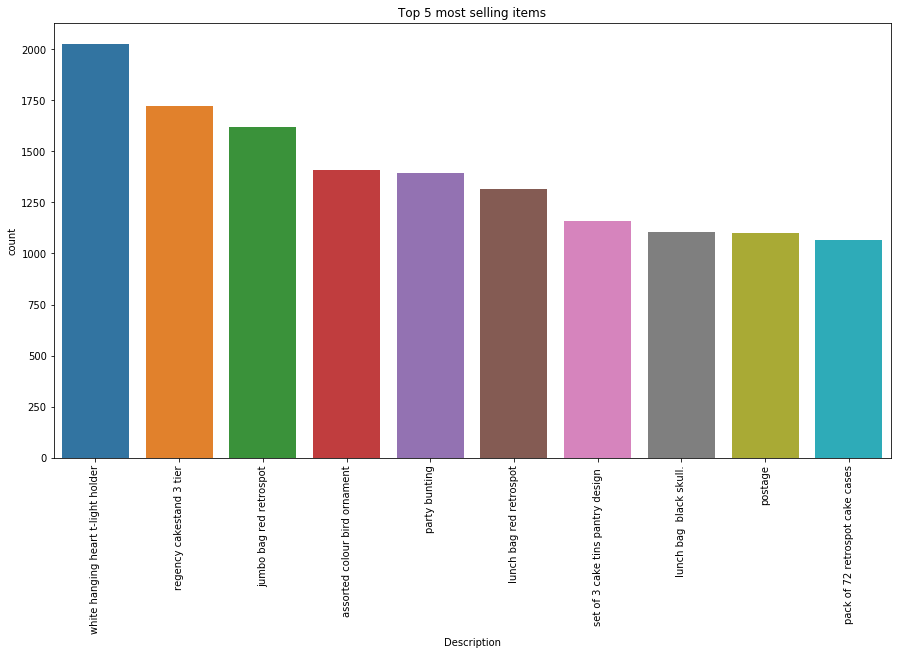

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig  =  plt.figure(figsize = (15,8))
sns.countplot(x  =  'Description', data  =  online, order  =  online['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Top 5 most selling items')
plt.show()

Dividing the total data into bins, wrt to 'Quantity' with range of 5000. We have total of 17 bins. New col name 'Quantity_Group'

In [22]:
online['Quantity_Group'] = pd.cut(online['Quantity'].dropna(),
                         [0,5000,10000,15000,20000,25000,30000,35000,40000,45000,
                          50000,55000,60000,65000,70000,75000,80000,85000],
#                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)
                         labels=['<5k','5k-10k','10k-15K','15K-20K','20K-25K','25K-30K','30K-35K','35K-40K',
                                '40K-45K','45K-50K','50K-55K','55K-60K','60K-65K','65K-70K','70K-75K',
                                 '75K-80K','80K-85K'], 
                                  include_lowest=True)

In [23]:
online['Quantity_Group'].count

<bound method Series.count of 0         <5k
1         <5k
2         <5k
3         <5k
4         <5k
5         <5k
6         <5k
7         <5k
8         <5k
9         <5k
10        <5k
11        <5k
12        <5k
13        <5k
14        <5k
15        <5k
16        <5k
17        <5k
18        <5k
19        <5k
20        <5k
21        <5k
22        <5k
23        <5k
24        <5k
25        <5k
26        <5k
27        <5k
28        <5k
29        <5k
         ... 
541879    <5k
541880    <5k
541881    <5k
541882    <5k
541883    <5k
541884    <5k
541885    <5k
541886    <5k
541887    <5k
541888    <5k
541889    <5k
541890    <5k
541891    <5k
541892    <5k
541893    <5k
541894    <5k
541895    <5k
541896    <5k
541897    <5k
541898    <5k
541899    <5k
541900    <5k
541901    <5k
541902    <5k
541903    <5k
541904    <5k
541905    <5k
541906    <5k
541907    <5k
541908    <5k
Name: Quantity_Group, Length: 397884, dtype: category
Categories (17, object): [<5k < 5k-10k < 10k-15K < 15K-20K ...

In [24]:
online.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Quantity_Group'],
      dtype='object')

# Apriori

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [32]:
#hot_encoded_online = online.groupby(['Quantity_Group','Description'])['Description'].count().unstack().reset_index().fillna(0).set_index('Quantity_Group')
hot_encoded_online = online.groupby(['Quantity_Group','Description'])['Description'].count().unstack().reset_index().set_index('Quantity_Group').fillna(0)
hot_encoded_online.head()

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,i love london mini rucksack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
Quantity_Group,,,,,,,,,,,,,,,,,,,,,
<5k,39.0,109.0,138.0,70.0,1.0,31.0,59.0,94.0,202.0,143.0,...,1.0,20.0,78.0,149.0,2.0,238.0,9.0,192.0,12.0,20.0
70K-75K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80K-85K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_online  =  hot_encoded_online.applymap(encode_units)

In [34]:
hot_encoded_online.head()

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,i love london mini rucksack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
Quantity_Group,,,,,,,,,,,,,,,,,,,,,
<5k,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
70K-75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80K-85K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
frequent_itemsets  =  apriori(hot_encoded_online, min_support = 0.01, use_colnames = True)

MemoryError: 

In [ ]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(10)

In [ ]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(10)

In [ ]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

# PLOT

In [ ]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)